In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
df = load_breast_cancer()
x = pd.DataFrame(df['data'], columns = df['feature_names'])
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y = pd.DataFrame(df['target'], columns=['Target'])
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


In [5]:
y.value_counts()

Target
1         357
0         212
dtype: int64

In [6]:
x_train,x_test, y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=50)
params=[{'C':[1,5,10,100,150,1000]}]

In [7]:
model = LogisticRegression()
model = GridSearchCV(model,param_grid=params,scoring='f1',cv=5)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 5, 10, 100, 150, 1000]}], scoring='f1')

In [8]:
print("Best C-value : ",model.best_estimator_)

Best C-value :  LogisticRegression(C=5)


In [9]:
model.score(x_test, y_test)

0.9723756906077348

In [10]:
test_probability = model.predict_proba(x_test)
pd.DataFrame(test_probability).head()

,0,1
0,0.003015,0.996985
1,0.000069,0.999931
2,0.875658,0.124342
3,0.056110,0.943890
4,0.002151,0.997849


In [11]:
np.argmax(model.predict_proba(x_test) , axis=1)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [12]:

model.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0])

In [13]:
## training accuracy
model.score(x_test , y_test)

0.9723756906077348

In [14]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
y_predict = model.predict(x_test)
confusion_matrix(y_test , y_predict)

array([[50,  3],
       [ 2, 88]], dtype=int64)

In [15]:
tpr = (50/(50+2))
fpr = (3/(3+88))

threshold_point = (fpr,tpr)
print("Threshold point : ",threshold_point)

Threshold point :  (0.03296703296703297, 0.9615384615384616)


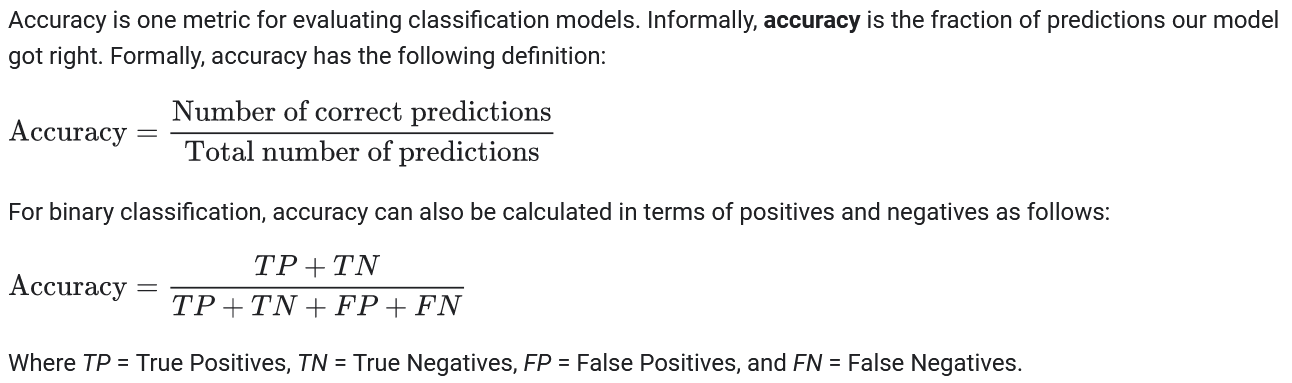

In [16]:
accuracy_score(y_test , y_predict)

0.965034965034965

In [17]:
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [18]:
fpr, tpr, threshold = roc_curve(y_test , y_predict)
auc = roc_auc_score(y_test , y_predict)

In [19]:
threshold_point

(0.03296703296703297, 0.9615384615384616)

In [1]:
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='ROC curve (area=%0.2f)' % auc)

plt.scatter(0.03296703296703297, 0.9615384615384616)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Reciever Operating Characteristic (ROC) Curve")

plt.legend()
plt.show()

NameError: name 'lr' is not defined

In [21]:
## Determine the threhold from the above curve ????


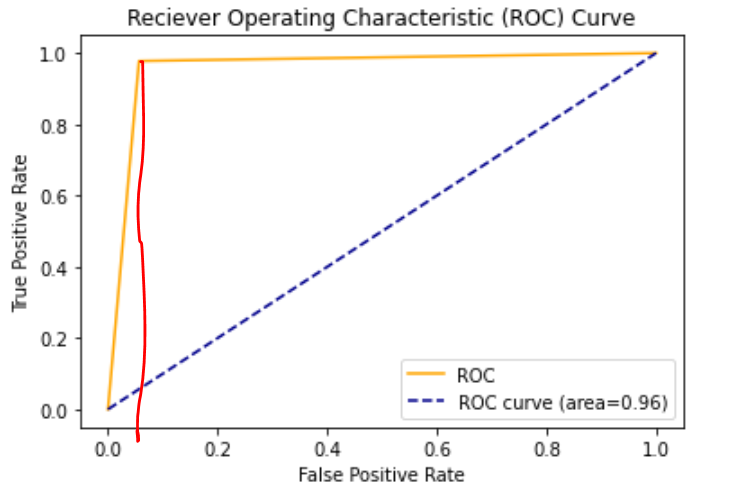